In [122]:
import rnn_models
import rnn_helpers
import imdb_helpers

import matplotlib.pyplot as plt
import numpy as np

import pickle

In [123]:
from rnn_models import *
from rnn_helpers import *
from imdb_helpers import *

import torch
import torch.nn as nn

In [323]:
import importlib
importlib.reload(rnn_models)
importlib.reload(rnn_helpers)
importlib.reload(imdb_helpers)
from rnn_models import *
from rnn_helpers import *
from imdb_helpers import *

In [4]:
# get training data and create a dictionary of words
data_path = '/Users/markliammurphy/Desktop/ESE599/imdb_sentiment_analysis/aclImdb'
train_reviews, train_targets = read_reviews(data_path)

In [263]:
test_reviews, test_targets = read_reviews(data_path, True)

## RNN1 using top 150 words

In [264]:
# find the top words in the dictionary and limit reviews
vocab_size = 150
train_reviews_preprocessed, dictionary = preprocess_reviews(train_reviews, 
                                                            vocab_size)
test_reviews_preprocessed = process_reviews(test_reviews, dictionary)

In [31]:
n_words = len(dictionary)
n_hidden = len(dictionary)
model = RNN1(n_words, n_hidden)

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.0001
gradient_norm = 0.05
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

n_iters = 50000
print_every = 1000
plot_every = 1000

current_loss = 0
all_losses = []

for i in range(1, n_iters + 1):
    example = randomTrainingExample(train_reviews_preprocessed, 
                                    train_targets, 
                                    dictionary)
    output, loss = train(example, model, criterion, optimizer, 
                         gradient_norm, vocab_size)
    current_loss += loss
    
    if i % print_every == 0:
        print('iteration: %d (%d%%) \tloss: %.4f' %
              (i, i / n_iters * 100, loss))
        
    if i % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

iteration: 1000 (2%) 	loss: 0.7445
iteration: 2000 (4%) 	loss: 0.6772
iteration: 3000 (6%) 	loss: 0.6220
iteration: 4000 (8%) 	loss: 0.4689
iteration: 5000 (10%) 	loss: 0.0000
iteration: 6000 (12%) 	loss: 0.0000
iteration: 7000 (14%) 	loss: 0.3275
iteration: 8000 (16%) 	loss: 0.3264
iteration: 9000 (18%) 	loss: 0.0003
iteration: 10000 (20%) 	loss: 0.0372
iteration: 11000 (22%) 	loss: 4.1738
iteration: 12000 (24%) 	loss: 0.0606
iteration: 13000 (26%) 	loss: 0.0000
iteration: 14000 (28%) 	loss: 22.5874
iteration: 15000 (30%) 	loss: 2.0562
iteration: 16000 (32%) 	loss: 0.0000
iteration: 17000 (34%) 	loss: 0.0003
iteration: 18000 (36%) 	loss: 0.0000
iteration: 19000 (38%) 	loss: 0.0000
iteration: 20000 (40%) 	loss: 0.0003
iteration: 21000 (42%) 	loss: 0.0000
iteration: 22000 (44%) 	loss: 0.0000
iteration: 23000 (46%) 	loss: 0.0000
iteration: 24000 (48%) 	loss: 0.0000
iteration: 25000 (50%) 	loss: 7.8306
iteration: 26000 (52%) 	loss: 0.0114
iteration: 27000 (54%) 	loss: 0.0000
iteration: 28

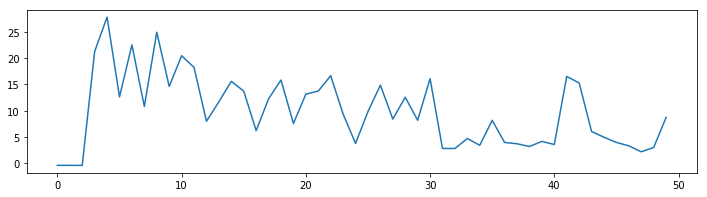

In [37]:
plt.figure(figsize=(12, 3))
plt.plot(np.log(all_losses))

In [51]:
err = 0
for i, review in enumerate(test_reviews_preprocessed):
    review_tensor = review2tensor(review, dictionary)
    prediction = predict(review_tensor, model, vocab_size)
    prediction_thresholded = 0 if prediction.item() < 0.5 else 1
    if prediction_thresholded != test_targets[i]:
        err += 1
err = err / len(test_reviews)

In [52]:
print("Test error: %.4f" % err)

Test error: 0.2470


## RNN2 using top 150 words 

In [57]:
n_words = len(dictionary)
n_hidden = len(dictionary)
model = RNN2(n_words, n_hidden)

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.0001
gradient_norm = 0.05
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

n_iters = 50000
print_every = 1000
plot_every = 1000

current_loss = 0
all_losses = []

for i in range(1, n_iters + 1):
    example = randomTrainingExample(train_reviews_preprocessed, 
                                    train_targets, 
                                    dictionary)
    output, loss = train(example, model, criterion, optimizer, 
                         gradient_norm, vocab_size)
    current_loss += loss
    
    if i % print_every == 0:
        print('iteration: %d (%d%%) \tloss: %.4f' %
              (i, i / n_iters * 100, loss))
        
    if i % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

iteration: 1000 (2%) 	loss: 0.6823
iteration: 2000 (4%) 	loss: 0.6598
iteration: 3000 (6%) 	loss: 0.7103
iteration: 4000 (8%) 	loss: 0.7138
iteration: 5000 (10%) 	loss: 0.6904
iteration: 6000 (12%) 	loss: 1.5643
iteration: 7000 (14%) 	loss: 0.6257
iteration: 8000 (16%) 	loss: 0.3644
iteration: 9000 (18%) 	loss: 3.9561
iteration: 10000 (20%) 	loss: 0.0325
iteration: 11000 (22%) 	loss: 0.0010
iteration: 12000 (24%) 	loss: 0.0816
iteration: 13000 (26%) 	loss: 0.0064
iteration: 14000 (28%) 	loss: 0.0059
iteration: 15000 (30%) 	loss: 4.1912
iteration: 16000 (32%) 	loss: 15.2215
iteration: 17000 (34%) 	loss: 3.0035
iteration: 18000 (36%) 	loss: 0.0000
iteration: 19000 (38%) 	loss: 6.3678
iteration: 20000 (40%) 	loss: 4.1157
iteration: 21000 (42%) 	loss: 0.0001
iteration: 22000 (44%) 	loss: 0.0001
iteration: 23000 (46%) 	loss: 0.0008
iteration: 24000 (48%) 	loss: 5.9838
iteration: 25000 (50%) 	loss: 0.0009
iteration: 26000 (52%) 	loss: 0.0000
iteration: 27000 (54%) 	loss: 9.1613
iteration: 28

In [61]:
torch.save(model.state_dict(), './models/rnn2')
with open('./models/rnn2_loss.pkl', 'wb') as f:
    pickle.dump(all_losses, f)

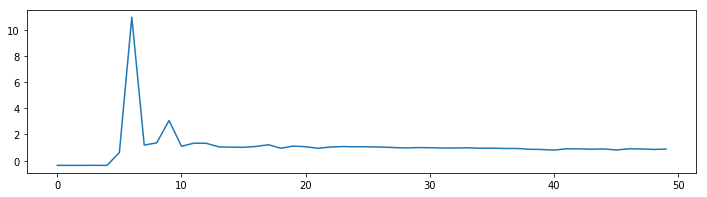

In [62]:
plt.figure(figsize=(12, 3))
plt.plot(np.log(all_losses))

In [63]:
err = 0
for i, review in enumerate(test_reviews_preprocessed):
    review_tensor = review2tensor(review, dictionary)
    prediction = predict(review_tensor, model, vocab_size)
    prediction_thresholded = 0 if prediction.item() < 0.5 else 1
    if prediction_thresholded != test_targets[i]:
        err += 1
err = err / len(test_reviews)

In [64]:
print("Test error: %.4f" % err)

Test error: 0.3242


In [67]:
torch.Tensor([4,5,6]) - 1

tensor([3., 4., 5.])

## RNN trained with minibatches

In [260]:
n_words = len(dictionary)
n_hidden = len(dictionary)
model = MinibatchRNN1(n_words, n_hidden)

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.0001
gradient_norm = 0.05
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

n_epochs = 6
batch_size = 4
n = len(train_reviews)
n_batches = int(np.ceil(n / batch_size))
print_every = 1000

all_losses = []
current_loss = 0
epoch_losses = []
        
train_reviews_arr = np.array(train_reviews_preprocessed)
train_targets_arr = np.array(train_targets)

for i in range(1, n_epochs + 1):
    # get indices for minibatches
    batch_ind = np.tile(range(n_batches), batch_size)[0:n]
    np.random.shuffle(batch_ind)

    # train and record losses for each batch
    for batch_i in range(n_batches):
        batch = prepare_batch(train_reviews_arr[batch_ind == batch_i], 
                              train_targets_arr[batch_ind == batch_i],
                              dictionary)
        
        output, loss = train_minibatch(batch, model, criterion, optimizer, 
                                       gradient_norm, vocab_size)
        current_loss += loss
        all_losses.append(loss / batch_size)
        
        if batch_i % print_every == 0:
            print('epoch: %d\tbatch: %d\tloss: %.4f' %
                  (i, batch_i, loss))
        
    epoch_losses.append(current_loss / n)


epoch: 1	batch: 0	loss: 0.6811
epoch: 1	batch: 1000	loss: 0.7015
epoch: 1	batch: 2000	loss: 0.6528
epoch: 1	batch: 3000	loss: 0.5841
epoch: 1	batch: 4000	loss: 0.5747
epoch: 1	batch: 5000	loss: 0.7495
epoch: 1	batch: 6000	loss: 0.6377
epoch: 2	batch: 0	loss: 0.2746
epoch: 2	batch: 1000	loss: 0.2553
epoch: 2	batch: 2000	loss: 0.6689
epoch: 2	batch: 3000	loss: 0.6295
epoch: 2	batch: 4000	loss: 0.9233
epoch: 2	batch: 5000	loss: 0.2584
epoch: 2	batch: 6000	loss: 0.5152
epoch: 3	batch: 0	loss: 0.4681
epoch: 3	batch: 1000	loss: 0.4843
epoch: 3	batch: 2000	loss: 0.6767
epoch: 3	batch: 3000	loss: 0.6410
epoch: 3	batch: 4000	loss: 0.4879
epoch: 3	batch: 5000	loss: 0.5681
epoch: 3	batch: 6000	loss: 0.8336
epoch: 4	batch: 0	loss: 0.7751
epoch: 4	batch: 1000	loss: 1.0112
epoch: 4	batch: 2000	loss: 0.9367
epoch: 4	batch: 3000	loss: 0.5572
epoch: 4	batch: 4000	loss: 0.1355
epoch: 4	batch: 5000	loss: 0.2291
epoch: 4	batch: 6000	loss: 0.6456
epoch: 5	batch: 0	loss: 0.7726
epoch: 5	batch: 1000	loss: 0.

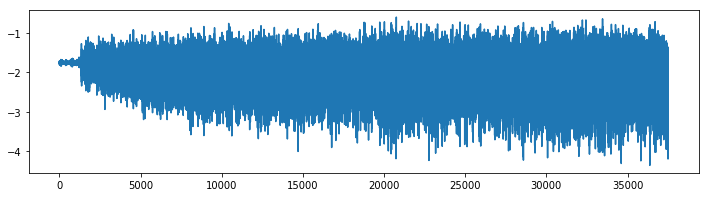

In [261]:
plt.figure(figsize=(12, 3))
plt.plot(np.log(all_losses))

In [293]:
batch_size = 500
test_reviews_arr = np.array(test_reviews)
test_targets_arr = np.array(test_targets)
n = len(test_reviews_arr)
n_batches = int(np.ceil(n / batch_size))
err = 0
for i in range(n_batches):
    start_ind = i * n_batches
    end_ind = i * n_batches + n_batches
    batch = prepare_batch(test_reviews_arr[start_ind:end_ind], 
                          test_targets_arr[start_ind:end_ind], 
                          dictionary)
    batch_target, batch_reviews, lengths = batch
    output = model(batch_reviews, lengths)
    prediction = nn.Sigmoid()(output)
    prediction_thresholded = (prediction > 0.5).float()
    err += sum(prediction_thresholded != batch_target).item()
err = err / n

In [294]:
print("Test error: %.4f" % err)

Test error: 0.0330


In [295]:
torch.save(model.state_dict(), './models/minibatch1')
with open('./models/minibatch1.pkl', 'wb') as f:
    pickle.dump(all_losses, f)

## LSTM Trained with Minibatches

In [328]:
n_words = len(dictionary)
n_hidden = len(dictionary)
model = MinibatchLSTM(n_words, n_hidden)

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.0001
gradient_norm = 10
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

n_epochs = 5
batch_size = 16
n = len(train_reviews)
n_batches = int(np.ceil(n / batch_size))
print_every = 50

all_losses = []
current_loss = 0
epoch_losses = []
        
train_reviews_arr = np.array(train_reviews_preprocessed)
train_targets_arr = np.array(train_targets)

for i in range(1, n_epochs + 1):
    # get indices for minibatches
    batch_ind = np.tile(range(n_batches), batch_size)[0:n]
    np.random.shuffle(batch_ind)

    # train and record losses for each batch
    for batch_i in range(n_batches):
        batch = prepare_batch(train_reviews_arr[batch_ind == batch_i], 
                              train_targets_arr[batch_ind == batch_i],
                              dictionary)
        
        output, loss = train_minibatch(batch, model, criterion, optimizer, 
                                       gradient_norm, vocab_size)
        current_loss += loss
        all_losses.append(loss / batch_size)
        
        if batch_i % print_every == 0:
            print('epoch: %d\tbatch: %d\tloss: %.4f' %
                  (i, batch_i, loss))
        
    epoch_losses.append(current_loss / n)


epoch: 1	batch: 0	loss: 0.6906
epoch: 1	batch: 50	loss: 0.6877
epoch: 1	batch: 100	loss: 0.6910
epoch: 1	batch: 150	loss: 0.6870
epoch: 1	batch: 200	loss: 0.6934
epoch: 1	batch: 250	loss: 0.6919
epoch: 1	batch: 300	loss: 0.6934
epoch: 1	batch: 350	loss: 0.6931
epoch: 1	batch: 400	loss: 0.6930
epoch: 1	batch: 450	loss: 0.6932
epoch: 1	batch: 500	loss: 0.6931
epoch: 1	batch: 550	loss: 0.6793
epoch: 1	batch: 600	loss: 0.6890
epoch: 1	batch: 650	loss: 0.6516
epoch: 1	batch: 700	loss: 0.6774
epoch: 1	batch: 750	loss: 0.6986
epoch: 1	batch: 800	loss: 0.6359
epoch: 1	batch: 850	loss: 0.6275
epoch: 1	batch: 900	loss: 0.5645
epoch: 1	batch: 950	loss: 0.6570
epoch: 1	batch: 1000	loss: 0.6054
epoch: 1	batch: 1050	loss: 0.6867
epoch: 1	batch: 1100	loss: 0.7076
epoch: 1	batch: 1150	loss: 0.6825
epoch: 1	batch: 1200	loss: 0.5942
epoch: 1	batch: 1250	loss: 0.7165
epoch: 1	batch: 1300	loss: 0.5586
epoch: 1	batch: 1350	loss: 0.6712
epoch: 1	batch: 1400	loss: 0.6689
epoch: 1	batch: 1450	loss: 0.7446
epo

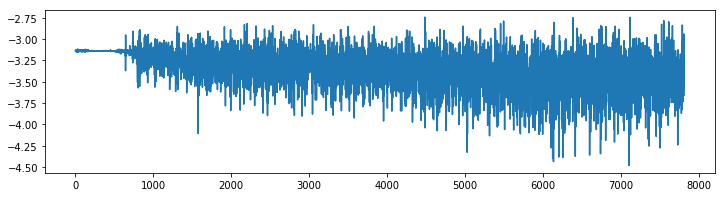

In [329]:
plt.figure(figsize=(12, 3))
plt.plot(np.log(all_losses))

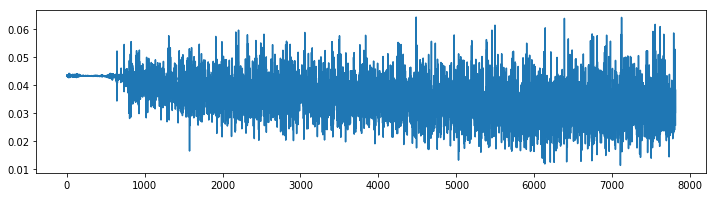

In [330]:
plt.figure(figsize=(12, 3))
plt.plot(all_losses)

In [335]:
batch_size = 500
test_reviews_arr = np.array(test_reviews)
test_targets_arr = np.array(test_targets)
n = len(test_reviews_arr)
n_batches = int(np.ceil(n / batch_size))
err = 0
for i in range(n_batches):
    start_ind = i * n_batches
    end_ind = i * n_batches + n_batches
    batch = prepare_batch(test_reviews_arr[start_ind:end_ind], 
                          test_targets_arr[start_ind:end_ind], 
                          dictionary)
    batch_target, batch_reviews, lengths = batch
    output = model(batch_reviews, lengths)
    prediction = nn.Sigmoid()(output)
    prediction_thresholded = (prediction > 0.5).float()
    err += sum(prediction_thresholded != batch_target).item()
err = err / n


In [333]:
print("Test error: %.4f" % err)

Test error: 0.0311


In [334]:
torch.save(model.state_dict(), './models/lstm')
with open('./models/lstm.pkl', 'wb') as f:
    pickle.dump(all_losses, f)